#### *Importing the required libraries

#### *Importing and pre-processing the dataset 

#### *Analysing and visualizing the Dataset to answer the following questions

1.Sales Trend according to Year and Month

2.Total Slaes,Profit,Quantity sold acc.to year

3.Finding which segment of the product provided maximum sales

4.Finding Top 10 countries that had max ssales and profit

5.Most profitable products acc. to country

6.Which order priprity is preferred by customers

7.Which shipment mode is preferred by customers

8.Finding the top 10 customers who made the most sales 

9.To find the customers who made the least sales

10.Which are the top 10 products that had max sale 

11.Which product from which category had max sales and profit


In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#imporing the dataset file 
data=pd.read_excel('Sales.xlsx')

In [3]:
data.head() # to view the head of the dataframe

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
data.columns # names of the columns pressent in the dataset

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [5]:
data.tail() # last 5 rows of dataset

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [6]:
data.index # start and ending values of index with stepcount 

RangeIndex(start=0, stop=51290, step=1)

In [7]:
#information of dataset which shows column names present, rows, and the datatype and also the type of the dataset
# also shows if the columns contain anny null values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
data.dtypes #datatype of each column of dataframe 

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [9]:
data.shape #shape of the dataframe which gives (rows,column) value

(51290, 21)

In [10]:
data.size #size of dataframe which gives total no. of items present in the dataframe

1077090

In [11]:
data.describe() #summary of dataframe of all the numerical columns present

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [12]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


In [13]:
data.isnull().sum() #to see the total number of null values in each column

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [14]:
data[data.duplicated()].shape # there are no duplicate data present

(0, 21)

In [15]:
data.notnull().sum() # total no. of nonnull values present

order_id          51290
order_date        51290
ship_date         51290
ship_mode         51290
customer_name     51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

In [16]:
# To find overall sales trend

data['order_date'].max() 

Timestamp('2014-12-31 00:00:00')

In [17]:
data['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [18]:
# creating a column with year-month of order date
data['year_month']=data['order_date'].apply(lambda x: x.strftime('%Y-%m')) 

In [19]:
data['year_month']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: year_month, Length: 51290, dtype: object

In [20]:
# craeting a dataframe of sales data according to month
dt_montly_trend = data.groupby('year_month').sum()['sales'].reset_index() 

In [21]:
dt_montly_trend

,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


Text(0, 0.5, 'sales-->')

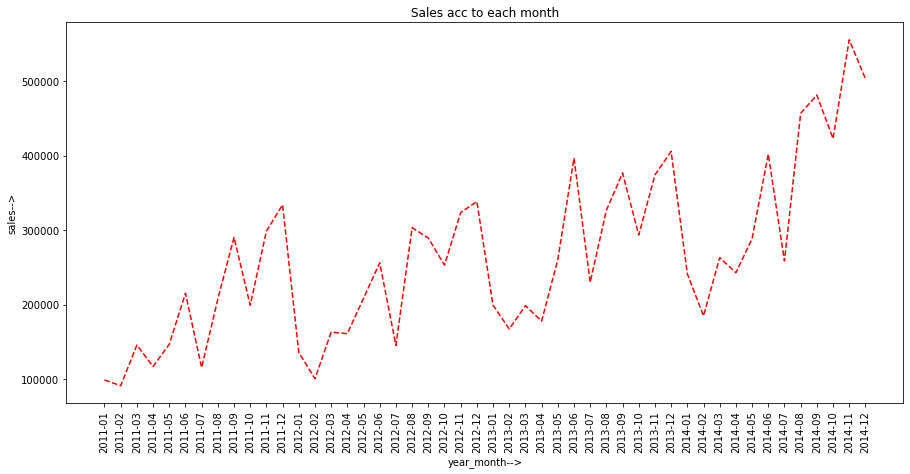

In [22]:
#visualiztion of sales according to month and year
plt.figure(figsize=(15,7))
plt.plot(dt_montly_trend['year_month'],dt_montly_trend['sales'],'r--')
plt.xticks(rotation=90)
plt.show
plt.title('Sales acc to each month')
plt.xlabel('year_month-->')
plt.ylabel('sales-->')

In [23]:
df = dt_montly_trend.sort_values('sales') # creating the dataframe with sorted values of sales with default as ascending order

In [24]:
df.head(1) # instance when sales was min

,year_month,sales
1,2011-02,91152.15698


In [25]:
df.tail(1) #instance when sales was max

,year_month,sales
46,2014-11,555279.027


In [26]:
data['year']=data['order_date'].dt.year

In [27]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [28]:
# year wise summary of total sales, profit, discount provided, quantity sold and shipping cost
year_sales_details=data.groupby('year').sum().reset_index()

In [29]:
year_sales_details

,year,sales,quantity,discount,profit,shipping_cost
0,2011,2.259451e+06,31443,1333.394,248940.81154,244270.34550
1,2012,2.677439e+06,38111,1548.774,307415.27910,283490.82400
2,2013,3.405746e+06,48136,1935.522,408512.76018,364548.74436
3,2014,4.299866e+06,60622,2512.038,504165.97046,460505.78954


<BarContainer object of 4 artists>

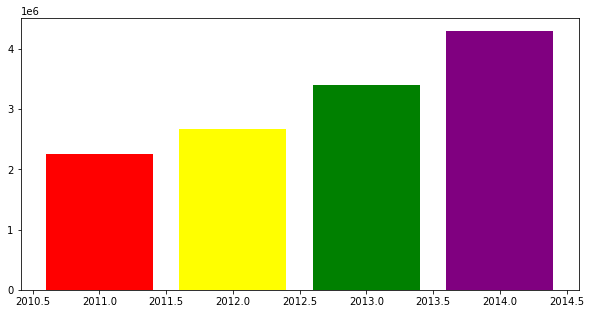

In [30]:
#visualization which shows which year has how many sales 
plt.figure(figsize=(10,5))
plt.bar('year','sales',data=year_sales_details,color=['red','yellow','green','purple'])

<BarContainer object of 4 artists>

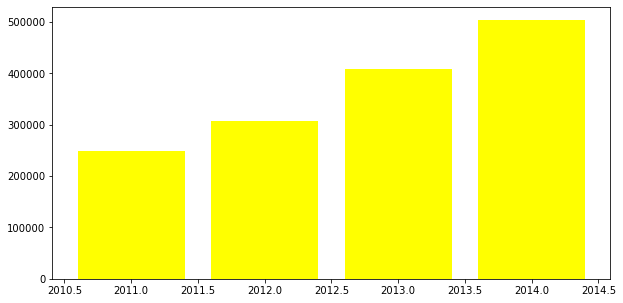

In [31]:
#visualization which shows which year has how much profit 
plt.figure(figsize=(10,5))
plt.bar('year','profit',data=year_sales_details,color='yellow')

In [32]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01


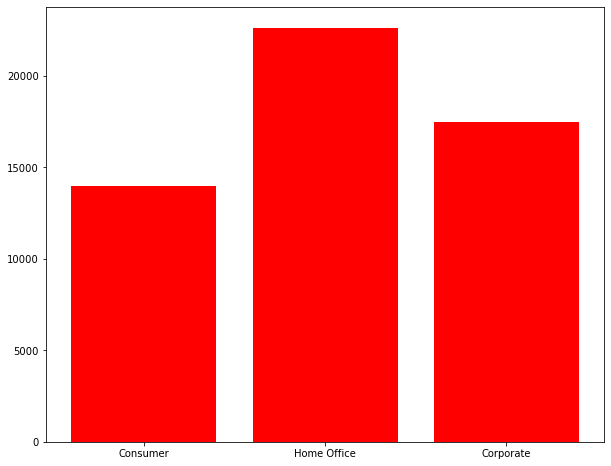

In [33]:
#visualization to see max sales range belonging to different segment(consumer,home office, coporate)
plt.figure(figsize=(10,8))
plt.bar('segment','sales',data=data,color='red')
plt.show()

In [34]:
country_profit=pd.DataFrame(data.groupby('country').sum()['profit'])

In [35]:
country_profit.sort_values(by='profit',ascending=False)[:10] # top 10 countries which made most profit

,profit
country,
United States,286397.02170
China,150683.08500
India,129071.83500
United Kingdom,111900.15000
France,109029.00300
Germany,107322.82050
Australia,105484.96300
Mexico,102818.09752
Spain,54390.12000


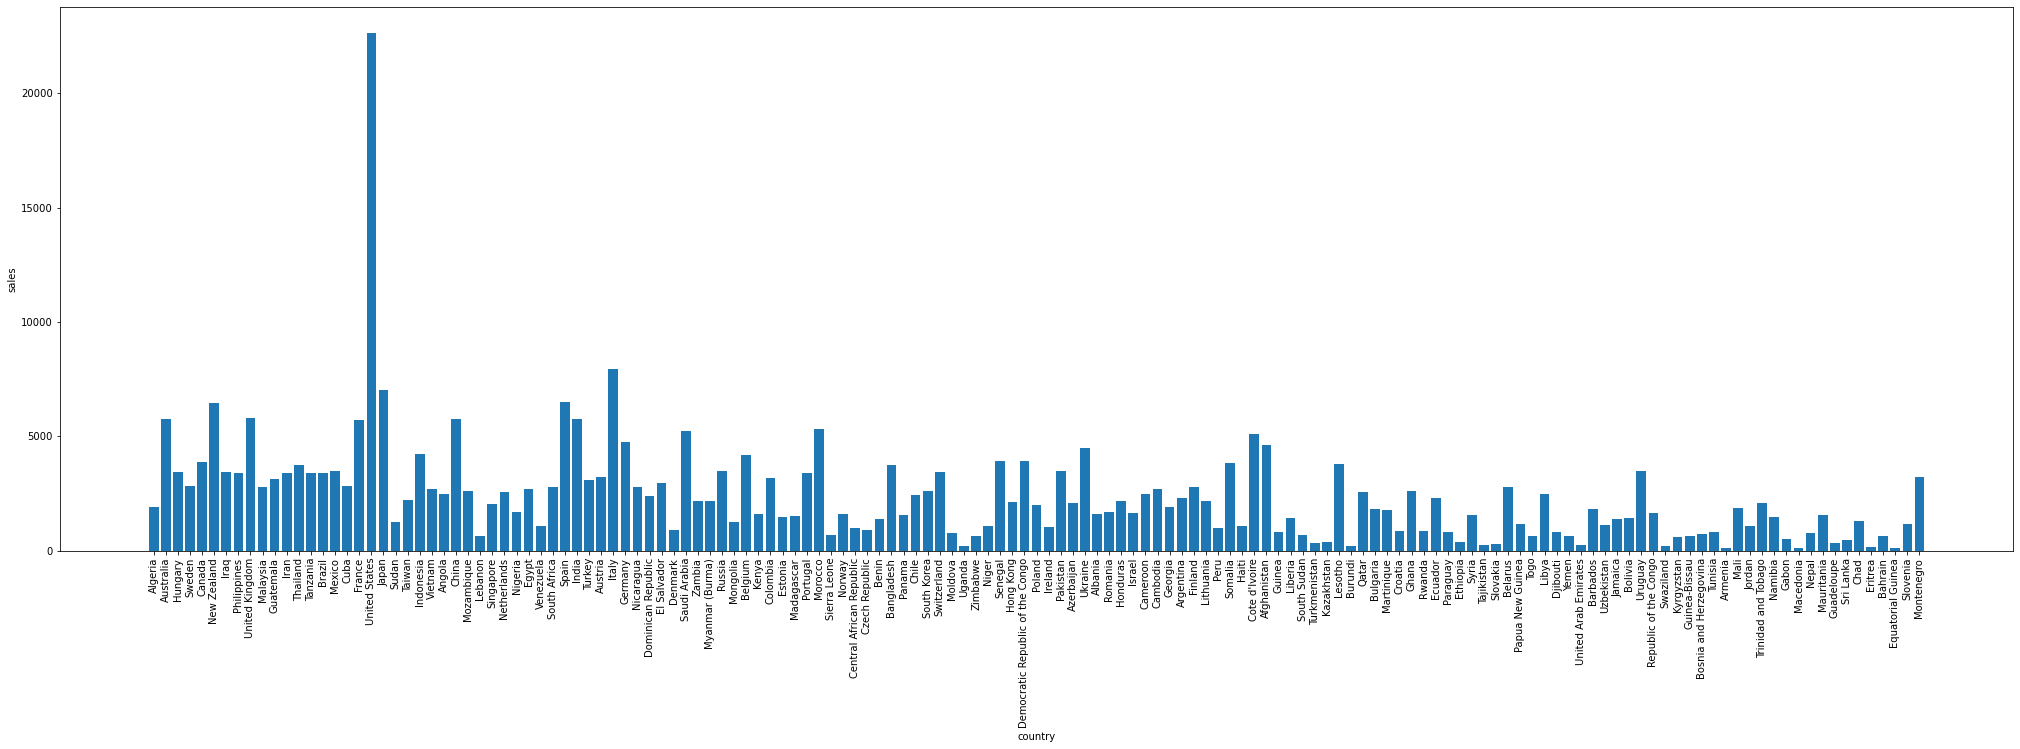

In [36]:
plt.figure(figsize=(35,10))
plt.bar('country','sales',data=data)
plt.xlabel('country')
plt.ylabel('sales')
plt.xticks(rotation=90)
plt.show()

In [37]:
# creating the dataframe to check the sales country wise
country_sales=pd.DataFrame(data.groupby('country').sum()['sales'])

In [38]:
country_sales

,sales
country,
Afghanistan,21673.32000
Albania,3888.12000
Algeria,36091.59000
Angola,25554.00000
Argentina,57511.78328
...,...
Venezuela,26587.82956
Vietnam,65800.19940
Yemen,2465.71200


In [39]:
country_sales.sort_values(by='sales',ascending=False)[:10] #top 10 coutries that has max sales

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


In [40]:
#country wise most profitable products
data.groupby(['country','product_name']).sum().sort_values(by='profit',ascending=False)[:10]

sales  \
country        product_name                                                    
United States  Canon imageCLASS 2200 Advanced Copier               61599.824   
               Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384   
               Hewlett Packard LaserJet 3310 Copier                18839.686   
Italy          Hoover Stove, Red                                   11937.870   
United States  Canon PC1060 Personal Laser Copier                  11619.834   
United Kingdom Nokia Smart Phone, Full Size                        16806.690   
Spain          Hamilton Beach Stove, Silver                        11947.980   
Mexico         Cisco Smart Phone, Full Size                        14787.200   
United States  HP Designjet T520 Inkjet Large Format Printer -...  18374.895   
France         SAFCO Executive Leather Armchair, Black              9914.400   

                                                                   quantity  \
country        product_name                                                   
United States  Canon imageCLASS 2200 Advanced Copier                     20   
               Fellowes PB500 Electric Punch Plastic Comb Bind...        31   
               Hewlett Packard LaserJet 3310 Copier                      38   
Italy          Hoover Stove, Red                                         21   
United States  Canon PC1060 Personal Laser Copier                        19   
United Kingdom Nokia Smart Phone, Full Size                              27   
Spain          Hamilton Beach Stove, Silver                              22   
Mexico         Cisco Smart Phone, Full Size                              34   
United States  HP Designjet T520 Inkjet Large Format Printer -...        12   
France         SAFCO Executive Leather Armchair, Black                   24   

                                                                   discount  \
country        product_name                                                   
United States  Canon imageCLASS 2200 Advanced Copier                    0.6   
               Fellowes PB500 Electric Punch Plastic Comb Bind...       2.4   
               Hewlett Packard LaserJet 3310 Copier                     1.6   
Italy          Hoover Stove, Red                                        0.0   
United States  Canon PC1060 Personal Laser Copier                       0.6   
United Kingdom Nokia Smart Phone, Full Size                             0.1   
Spain          Hamilton Beach Stove, Silver                             0.0   
Mexico         Cisco Smart Phone, Full Size                             0.0   
United States  HP Designjet T520 Inkjet Large Format Printer -...       0.5   
France         SAFCO Executive Leather Armchair, Black                  0.3   

                                                                       profit  \
country        product_name                                                     
United States  Canon imageCLASS 2200 Advanced Copier               25199.9280   
               Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.0390   
               Hewlett Packard LaserJet 3310 Copier                 6983.8836   
Italy          Hoover Stove, Red                                    5968.6200   
United States  Canon PC1060 Personal Laser Copier                   4570.9347   
United Kingdom Nokia Smart Phone, Full Size                         4560.7500   
Spain          Hamilton Beach Stove, Silver                         4540.1400   
Mexico         Cisco Smart Phone, Full Size                         4471.7200   
United States  HP Designjet T520 Inkjet Large Format Printer -...   4094.9766   
France         SAFCO Executive Leather Armchair, Black              4075.9200   

                                                                   shipping_cost  \
country        product_name                                                        
United States  Canon imageCLASS 2200 Advanced Copier                  1

In [41]:
#country wise least 20 products sold
data.groupby(['country','product_name']).sum().sort_values(by=['quantity','sales'])[:20]

,,sales,quantity,discount,profit,shipping_cost,year
country,product_name,,,,,,
Zimbabwe,"Avery Hole Reinforcements, Clear",1.161,1,0.7,-2.349,0.070,2014
Nigeria,"Wilson Jones Hole Reinforcements, Clear",1.197,1,0.7,-2.373,0.120,2012
Zimbabwe,"Wilson Jones Hole Reinforcements, Clear",1.197,1,0.7,-2.373,0.060,2014
Nigeria,"Avery Hole Reinforcements, Economy",1.323,1,0.7,-3.087,0.060,2013
Zimbabwe,"Wilson Jones Hole Reinforcements, Economy",1.359,1,0.7,-0.921,0.120,2014
Argentina,"Avery Index Tab, Economy",1.566,1,0.7,-1.794,0.058,2012
Nigeria,"Wilson Jones Index Tab, Clear",1.773,1,0.7,-3.627,0.170,2013
Argentina,"Acco Index Tab, Durable",1.788,1,0.7,-2.872,0.084,2011
Nigeria,"Novimex File Folder Labels, Adjustable",1.845,1,0.7,-3.075,0.170,2013


In [42]:
data['product_name'].nunique() #total number of unique entries in product name column

3788

In [43]:
data.groupby('product_name').sum() # sum of the total of each unique product name

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10,6042
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124
...,...,...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660,24,0.4,115.6440,28.12,10064
iOttie HLCRIO102 Car Mount,215.892,12,0.8,-11.9940,51.19,10062
iOttie XL Car Mount,223.888,14,0.4,-50.3748,18.64,4028


In [44]:
# creating a dataframe by grouping product name acc. to sales
sales_on_products=pd.DataFrame(data.groupby('product_name').sum()['sales'])

In [45]:
sales_on_products.head(1)

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228


In [46]:
sales_on_products=sales_on_products.sort_values('sales',ascending=False) # sorting of dataframe in descending order

In [47]:
sales_on_products.head(10) #top 10 products acc. to max sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [48]:
# to find the most selling products
# creating a dataframe according to sum quantity of each product name
most_sales=pd.DataFrame(data.groupby('product_name').sum()['quantity']) 

In [49]:
most_sales = most_sales.sort_values('quantity',ascending=False) #sorting the dataframe in descending order

In [50]:
most_sales.head()

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


In [51]:
# prefered ship mode
data.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01


C:\Users\Sunaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_priority', ylabel='count'>

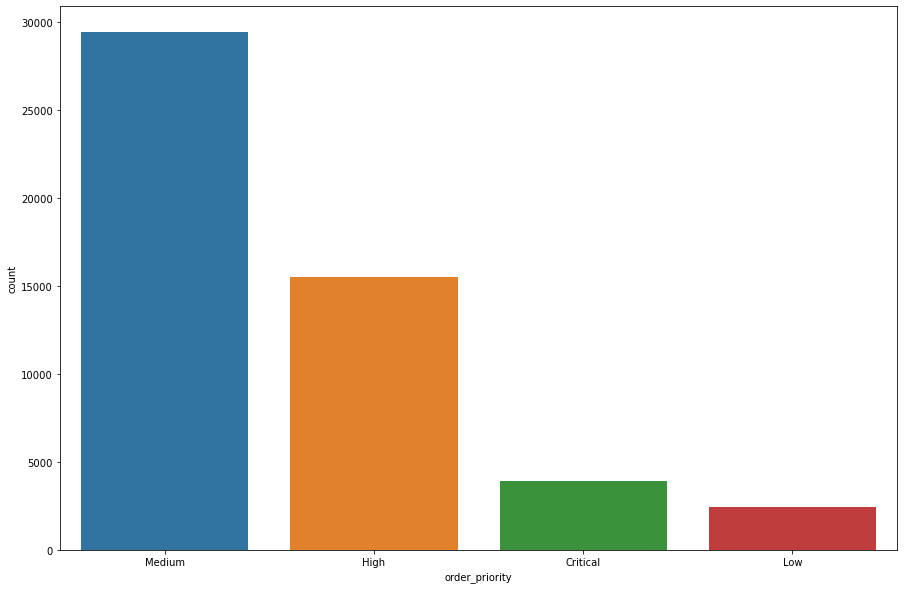

In [52]:
# visualization of commonly used order priority
plt.figure(figsize=(15,10))   
sns.countplot(data['order_priority'])

In [53]:
# grouping the dataframe acc. to ship mode which gives details of sales based on ship mode
data.groupby('ship_mode').sum()

,sales,quantity,discount,profit,shipping_cost,year
ship_mode,,,,,,
First Class,1.830976e+06,26039,1117.478,208104.67520,308102.54154,15105857
Same Day,6.672020e+05,9230,387.662,76173.06780,115973.71600,5436542
Second Class,2.565672e+06,35724,1449.656,294161.05708,314111.79036,20749877
Standard Class,7.578652e+06,107319,4374.932,890596.02120,614627.65550,61943067


In [54]:
data.groupby('ship_mode').sum()['quantity'] # total number of quantity sold acc. to ship mode

ship_mode
First Class        26039
Same Day            9230
Second Class       35724
Standard Class    107319
Name: quantity, dtype: int64

C:\Users\Sunaina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

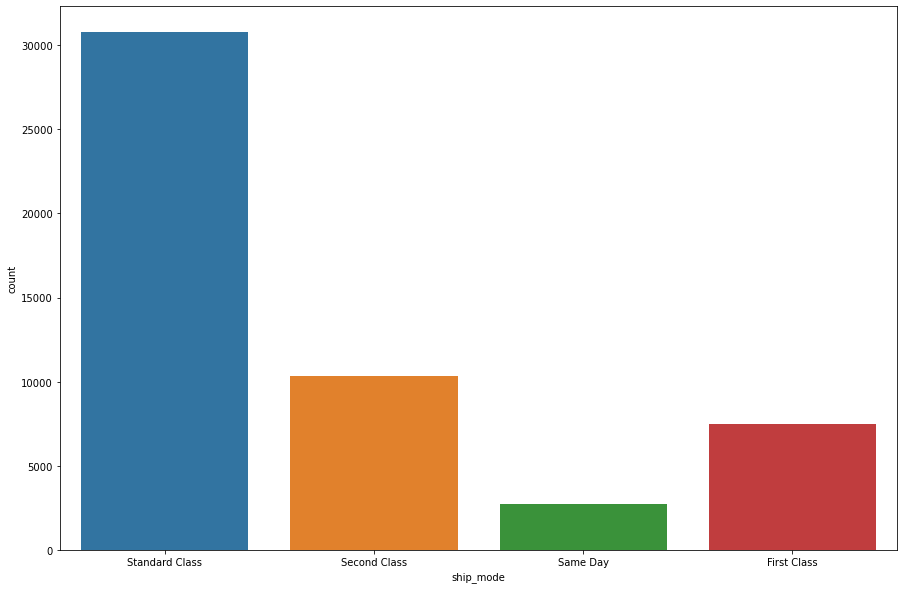

In [55]:
#  visualization of most preffered ship mode
plt.figure(figsize=(15,10))   
sns.countplot(data['ship_mode'])

In [56]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01


In [57]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [58]:
# most profitable category and sub_category

data.groupby(['category','sub_category']).sum()

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06      8310   370.710  161924.41950   
                Chairs        1.501682e+06     12336   560.120  141973.79750   
                Furnishings   3.855783e+05     11225   478.880   46967.42550   
                Tables        7.570419e+05      3083   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06      6078   248.700  141680.58940   
                Art           3.720920e+05     16301   573.080   57953.91090   
                Binders       4.619115e+05     21429  1102.480   72449.84600   
                Envelopes     1.709043e+05      8380   320.810   29601.11630   
                Fasteners     8.324232e+04      8390   340.240   11525.42410   
                Labels        7.340403e+04      9322   313.890   15010.51200   
                Paper         2.442917e+05     12822   387.300   59207.68270   
                Storage       1.127086e+06     16917   700.490  108461.48980   
                Supplies      2.430742e+05      8543   310.200   22583.26310   
Technology      Accessories   7.492370e+05     10946   370.480  129626.30620   
                Copiers       1.509436e+06      7454   260.418  258567.54818   
                Machines      7.790601e+05      4906   252.000   58867.87300   
                Phones        1.706824e+06     11870   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

In [86]:
#creating a dataframe acc. to total profit of category and sub_category 
prof_cat_subcat=pd.DataFrame(data.groupby(['category','sub_category']).sum()['profit'])

In [60]:
prof_cat_subcat = prof_cat_subcat.sort_values(['category','profit'],ascending=False) #sorting the dataframe in descending order

In [61]:
prof_cat_subcat

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

<AxesSubplot:xlabel='sub_category', ylabel='profit'>

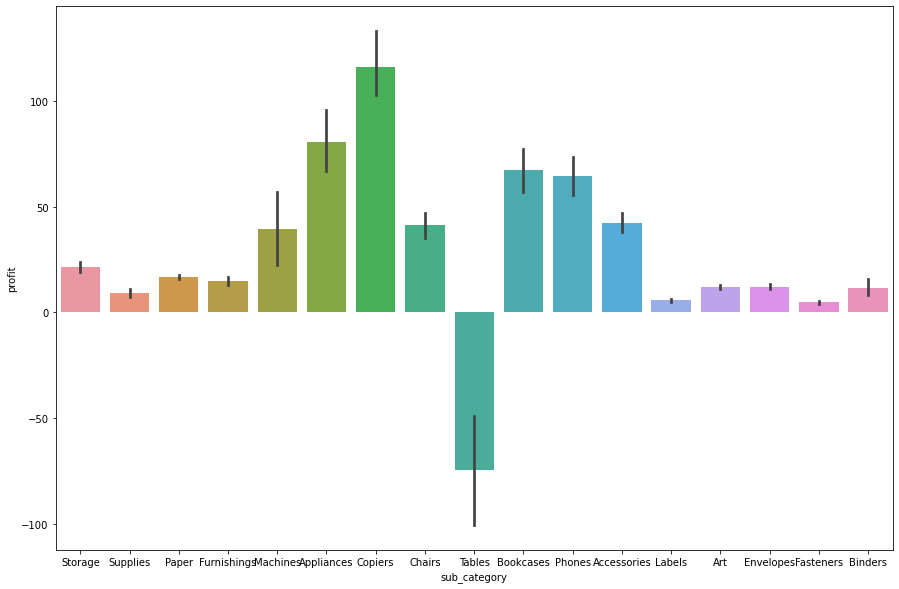

In [62]:
plt.figure(figsize=(15,10))  # visualization of profit according to subcategory
sns.barplot(x='sub_category',y='profit',data=data)

In [63]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [64]:
# grouping based on customer names to see who made how many number of sales
customer_most_sales=data.groupby('customer_name').sum()['sales']

In [65]:
customer_most_sales

customer_name
Aaron Bergman         24644.62750
Aaron Hawkins         20759.51384
Aaron Smayling        14212.62840
Adam Bellavance       20186.77840
Adam Hart             21718.20142
                         ...     
Xylona Preis          12198.95060
Yana Sorensen         20032.43800
Yoseph Carroll        20164.37760
Zuschuss Carroll      28479.99226
Zuschuss Donatelli    12430.57040
Name: sales, Length: 795, dtype: float64

In [66]:
customer_most_sales.sort_values(ascending=False)[0:10]  # top 10 customers who made most number of sales

customer_name
Tom Ashbrook          40488.07080
Tamara Chand          37457.33300
Greg Tran             35550.95428
Christopher Conant    35187.07640
Sean Miller           35170.93296
Bart Watters          32310.44650
Natalie Fritzler      31781.25850
Fred Hopkins          30400.67452
Jane Waco             30288.45030
Hunter Lopez          30243.56658
Name: sales, dtype: float64

In [67]:
customer_most_sales.sort_values()[0:10] # customers who made least number of sales

customer_name
Vivian Mathis          3892.22700
Catherine Glotzbach    4115.20800
Karen Seio             5324.97318
Sung Shariari          5328.46480
Michael Oakman         5460.58400
Nicole Brennan         5935.07540
Robert Barroso         6256.18840
David Bremer           6273.82662
Allen Armold           6538.68700
Erin Creighton         6731.55110
Name: sales, dtype: float64

In [68]:
# to create a dataframe where customer and their total profits made beacause of them
customer_most_profits=data.groupby('customer_name').sum()['profit']

In [69]:
customer_most_profits

customer_name
Aaron Bergman         4683.20800
Aaron Hawkins         2450.92904
Aaron Smayling         369.16180
Adam Bellavance       4979.97690
Adam Hart             1902.03342
                         ...    
Xylona Preis          1304.72260
Yana Sorensen         3450.40630
Yoseph Carroll        4347.17660
Zuschuss Carroll       436.93626
Zuschuss Donatelli     201.73710
Name: profit, Length: 795, dtype: float64

In [70]:
customer_most_profits.sort_values(ascending=False)[0:10] #top 10 customers who contributed to most of profit 

customer_name
Tamara Chand       8672.89890
Raymond Buch       8453.04950
Sanjit Chand       8205.37990
Hunter Lopez       7816.56778
Bill Eplett        7410.00530
Harry Marie        6958.28640
Susan Pistek       6484.40726
Mike Gockenbach    6458.67620
Adrian Barton      6417.28450
Tom Ashbrook       6311.97910
Name: profit, dtype: float64

In [71]:
customer_most_quantity=data.groupby('customer_name').sum()['quantity']

In [72]:
customer_most_quantity

customer_name
Aaron Bergman         301
Aaron Hawkins         231
Aaron Smayling        211
Adam Bellavance       262
Adam Hart             293
                     ... 
Xylona Preis          213
Yana Sorensen         215
Yoseph Carroll        203
Zuschuss Carroll      334
Zuschuss Donatelli    174
Name: quantity, Length: 795, dtype: int64

In [73]:
customer_most_quantity.sort_values(ascending=False)[0:10]  # customer who bought most quantity of products

customer_name
Bill Eplett        411
Eric Murdock       392
Steven Ward        383
Gary Hwang         377
John Grady         370
Patrick O'Brill    370
Brosina Hoffman    355
Muhammed Yedwab    351
Eugene Moren       346
Harry Greene       343
Name: quantity, dtype: int64

In [74]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01


In [75]:
#To find quarterly sales for per year

data['quarter']= data['order_date'].dt.quarter

In [76]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month,quarter
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01,1


In [77]:
data['quarter'] = 'Q' + data['quarter'].astype(str)

In [78]:
data['quarter']

0        Q1
1        Q1
2        Q1
3        Q1
4        Q1
         ..
51285    Q4
51286    Q4
51287    Q4
51288    Q4
51289    Q4
Name: quarter, Length: 51290, dtype: object

In [79]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month,quarter
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,Q1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,Q1


In [80]:
data.tail(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month,quarter
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12,Q4
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014,2014-12,Q4


In [81]:
quarterly_sales=pd.DataFrame(data.groupby(['year','quarter']).sum()['sales'])

In [82]:
quarterly_sales 

sales
year quarter              
2011 Q1       3.357800e+05
     Q2       4.788710e+05
     Q3       6.133064e+05
     Q4       8.314935e+05
2012 Q1       3.993677e+05
     Q2       6.255929e+05
     Q3       7.377689e+05
     Q4       9.147092e+05
2013 Q1       5.650196e+05
     Q2       8.348395e+05
     Q3       9.330370e+05
     Q4       1.072850e+06
2014 Q1       6.892067e+05
     Q2       9.329870e+05
     Q3       1.196483e+06
     Q4       1.481189e+06

In [83]:
#to see which quarter or which year had maximum sales
quarterly_sales.sort_values(by='sales',ascending=False)

sales
year quarter              
2014 Q4       1.481189e+06
     Q3       1.196483e+06
2013 Q4       1.072850e+06
     Q3       9.330370e+05
2014 Q2       9.329870e+05
2012 Q4       9.147092e+05
2013 Q2       8.348395e+05
2011 Q4       8.314935e+05
2012 Q3       7.377689e+05
2014 Q1       6.892067e+05
2012 Q2       6.255929e+05
2011 Q3       6.133064e+05
2013 Q1       5.650196e+05
2011 Q2       4.788710e+05
2012 Q1       3.993677e+05
2011 Q1       3.357800e+05

In [84]:
#exporting the dataframe to excel
quarterly_sales.to_excel(r"C:\Users\Sunaina\Documents\DA\quarterly_sales.xlsx")

Visualization done through excel after exporting

Graph representing sales per year according to each quarter

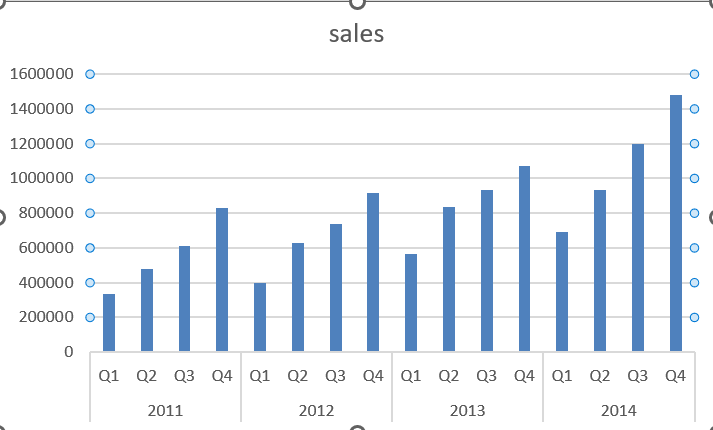